In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import re # for regurlar expressions


### 1. Data Sourcing

In [116]:
# Reading dataset from local into load_data variable.
#The data is about whether a client has payment difficulties
loan_data = pd.read_csv("application_data.csv")

In [117]:
# Checking the shape of the data set loaded.
loan_data.shape


(307511, 122)

In [118]:
# Checking the attributes of the datset
loan_data.describe

<bound method NDFrame.describe of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      

In [119]:
# Getting the insight of the values in each column of the dataset.
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
#Checking the data types of the columns of the data set
loan_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

### 2. Data Cleaning

In [121]:
# Calculating the sum of null values in the data set.
loan_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [122]:
# Taking the absolute value of the days of birth in the data set.
loan_data['DAYS_BIRTH']=abs(loan_data['DAYS_BIRTH'])
loan_data['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [123]:
# Checking the data set values.
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
# Creating bins for range of age
bins = [0,7300,10950,14600,18250,21900,25500]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']

loan_data['AGE_RANGE']=pd.cut(loan_data['DAYS_BIRTH'],bins,labels=slot)


In [125]:
# Checking the data set values.
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50-60


In [126]:
# Creating bins for Amount Credit Rnage
bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']

loan_data['AMT_CREDIT_RANGE']=pd.cut(loan_data['AMT_CREDIT'],bins=bins,labels=slots)

In [127]:
# Creating bins for Amount Income Range
bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']

loan_data['AMT_INCOME_RANGE']=pd.cut(loan_data['AMT_INCOME_TOTAL'],bins,labels=slot)


In [128]:
# Checking the data set values.
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_RANGE,AMT_CREDIT_RANGE,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,20-30,Medium,Medium
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,High,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,50-60,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,Medium,Low


In [129]:
# Counting for pending Null Values.
loan_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AGE_RANGE                         0
AMT_CREDIT_RANGE                  0
AMT_INCOME_RANGE                  0
Length: 125, dtype: int64

In [130]:
# Considering the null count variable to hold the count of null values.
null_count=round(100*(loan_data.isnull().sum()/len(loan_data.index)),2)
null_count


SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
AGE_RANGE                      0.0
AMT_CREDIT_RANGE               0.0
AMT_INCOME_RANGE               0.0
Length: 125, dtype: float64

In [131]:
# Getting the null count of values having count more than 30
null_count=null_count[null_count>=32]
null_count

OWN_CAR_AGE                     65.99
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTM

In [132]:
# Cross verifying the number of columns that will be considered for dropping. 
len(null_count)

49

In [133]:
# Dropping the columns having null count greater than 30.
cols_dropped=([null_count[null_count >=32].index])


In [134]:
# Dropping the values having null count greater than 30.
loan_data.drop(labels=cols_dropped[0],axis=1,inplace=True)

In [135]:
# Checking the shape of data set.
loan_data.shape

(307511, 76)

In [136]:
# Considering the number of candidates owning a car 
loan_data.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [137]:
# Check for nulls pending
loan_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AGE_RANGE                         0
AMT_CREDIT_RANGE                  0
AMT_INCOME_RANGE                  0
Length: 76, dtype: int64

In [138]:
# Remove unwanted columns
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

loan_data.drop(labels=unwanted,axis=1,inplace=True)

In [139]:
# Find the median value of Annuity and fill the missing values with it.
print(loan_data['AMT_ANNUITY'].median())
median_val_annuity=loan_data['AMT_ANNUITY'].median()

24903.0


In [140]:
# Impute the missing values for Amount Annuity column 
loan_data.loc[loan_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=median_val_annuity

In [141]:
# Checking for null values in the data set.
loan_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
R

In [142]:
# Checking the values of the Code Gender.
loan_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [143]:
# Imputing the values of the Code Gende: XNA to valid value 'Female' that is occuring more than Male counts.
loan_data.loc[loan_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
loan_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [144]:
#Checking the Male counts of Code Gender.
loan_data[loan_data['CODE_GENDER']=='M']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_RANGE,AMT_CREDIT_RANGE,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,20-30,Medium,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,Medium,Low
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40-50,Medium,Low
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307492,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,High,High
307494,456238,0,Cash loans,M,Y,N,1,270000.0,479700.0,46858.5,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,40-50,Medium,Medium
307495,456239,0,Cash loans,M,Y,N,0,180000.0,808650.0,23773.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50-60,High,Low
307498,456242,0,Cash loans,M,Y,Y,0,198000.0,1312110.0,52168.5,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,50-60,High,Low


## 3. Data Analysis

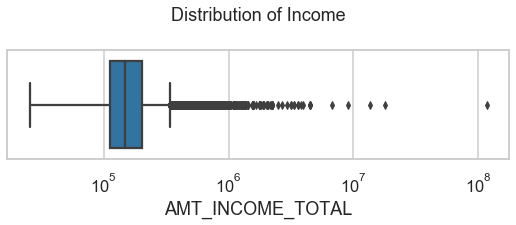

In [145]:
# Box Plot for distribution of Income
# sns.boxplot(loan_data.AMT_INCOME_TOTAL)
# plt.show()
plt.figure(figsize=(9,2))
sns.boxplot(loan_data.AMT_INCOME_TOTAL)
plt.xscale('log')
plt.title('Distribution of Income')
plt.show()


In [146]:
print(loan_data['AMT_INCOME_TOTAL'].quantile(0.10))
print(loan_data['AMT_INCOME_TOTAL'].quantile(0.95))

81000.0
337500.0


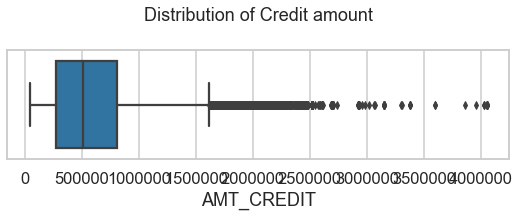

In [147]:
# Box plot for Distribution of Credit Amount.
plt.figure(figsize=(9,2))
sns.boxplot(loan_data.AMT_CREDIT)
plt.title('Distribution of Credit amount')
plt.show()

In [148]:
print(loan_data['AMT_CREDIT'].quantile(0.10))
print(loan_data['AMT_CREDIT'].quantile(0.99))

180000.0
1854000.0


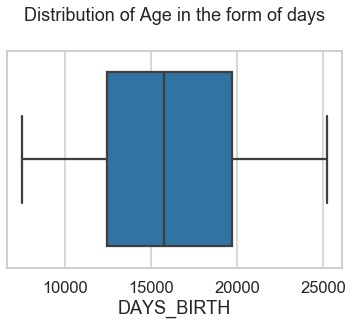

In [149]:
# Box plot for Distribution of Age in the form of days.
sns.boxplot(loan_data.DAYS_BIRTH)
plt.title('Distribution of Age in the form of days')
plt.show()

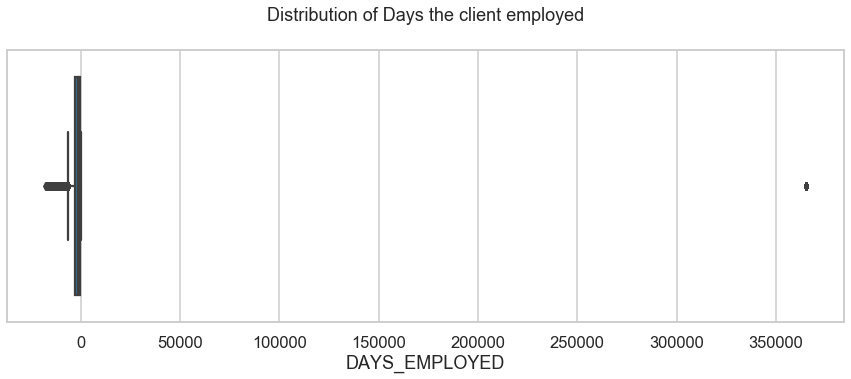

In [150]:
# Box plot for distribution of Days the client is employed
plt.figure(figsize=(15,5))
sns.boxplot(loan_data.DAYS_EMPLOYED)
#plt.yscale('log')
plt.title('Distribution of Days the client employed')

plt.show()

## Organization Type

In [151]:
loan_data['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [152]:
## List all unique values of the Org Type
loan_data['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [153]:
## Count the number of values having XNA in Organization Type
(loan_data['ORGANIZATION_TYPE']=='XNA').sum()

55374

In [154]:
loan_data=loan_data.drop(loan_data.loc[loan_data['ORGANIZATION_TYPE']=='XNA'].index)
loan_data[loan_data['ORGANIZATION_TYPE']=='XNA'].shape

(0, 46)

## Creating Target Variables:
1. t0: All Other.
2. t1: Candidates with payment difficulties.

In [155]:
t0=loan_data[loan_data['TARGET']==0]
t1=loan_data[loan_data['TARGET']==1]

In [156]:
t0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_RANGE,AMT_CREDIT_RANGE,AMT_INCOME_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,High,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50-60,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,Medium,Low
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40-50,Medium,Low


In [157]:
t1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_RANGE,AMT_CREDIT_RANGE,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,20-30,Medium,Medium
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,50-60,High,Low
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0.0,0.0,0.0,0.0,2.0,0.0,4.0,40-50,High,Medium
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,30-40,Low,Low
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,20-30,High,Medium


In [158]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

print("The Imbalance Ratio is:",round(len(t0)/len(t1),2))

The Imbalance Ratio is: 10.55


## 4. Data Plotting.

### 1. Target with Annual Income

In [159]:
t0.AMT_INCOME_TOTAL.describe()

count    2.303020e+05
mean     1.764984e+05
std      1.154998e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.160000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

In [160]:
t1.AMT_INCOME_TOTAL.describe()

count    2.183500e+04
mean     1.697506e+05
std      7.956149e+05
min      2.700000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

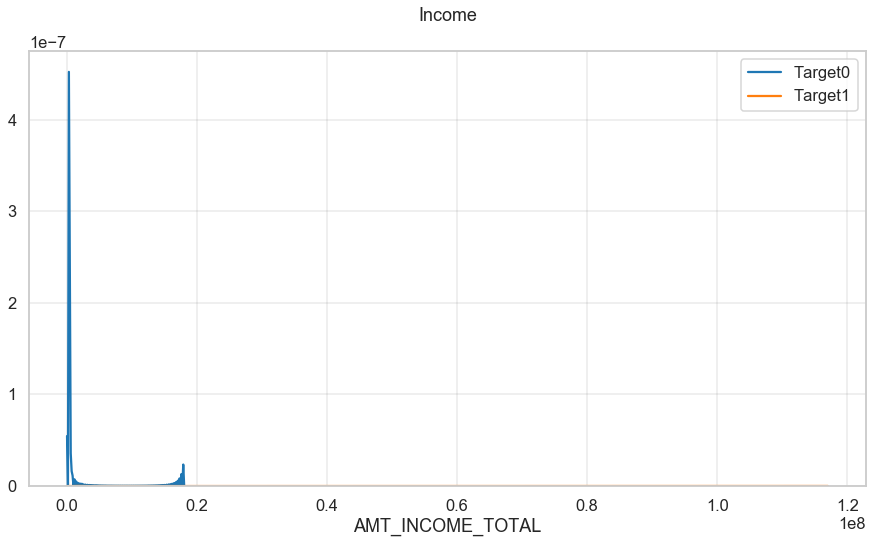

In [161]:
plt.figure(figsize = (15, 8))
plt.title('Income')
sns.distplot(t0.AMT_INCOME_TOTAL ,hist = False, label="Target0")
sns.distplot(t1.AMT_INCOME_TOTAL ,hist = False, label="Target1")
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

### 2. Target with Annual Credit

In [162]:
t0.AMT_CREDIT.describe()

count    2.303020e+05
mean     6.164879e+05
std      4.114378e+05
min      4.500000e+04
25%      2.762775e+05
50%      5.212800e+05
75%      8.353800e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [163]:
t1.AMT_CREDIT.describe()

count    2.183500e+04
mean     5.577178e+05
std      3.460483e+05
min      4.500000e+04
25%      2.844000e+05
50%      4.959855e+05
75%      7.290000e+05
max      4.027680e+06
Name: AMT_CREDIT, dtype: float64

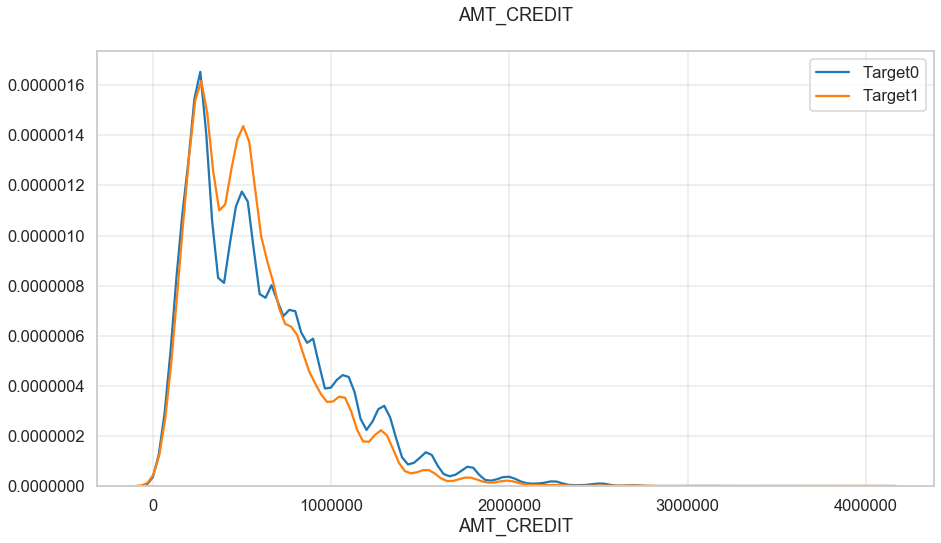

In [164]:
plt.figure(figsize = (15, 8))
plt.title('AMT_CREDIT')
sns.distplot(t0.AMT_CREDIT ,hist = False, label="Target0")
sns.distplot(t1.AMT_CREDIT ,hist = False, label="Target1")
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()


### 3. Target with Gender

In [165]:
t0.CODE_GENDER.describe()

count     230302
unique         2
top            F
freq      145260
Name: CODE_GENDER, dtype: object

In [166]:
t1.CODE_GENDER.describe()

count     21835
unique        2
top           F
freq      11921
Name: CODE_GENDER, dtype: object

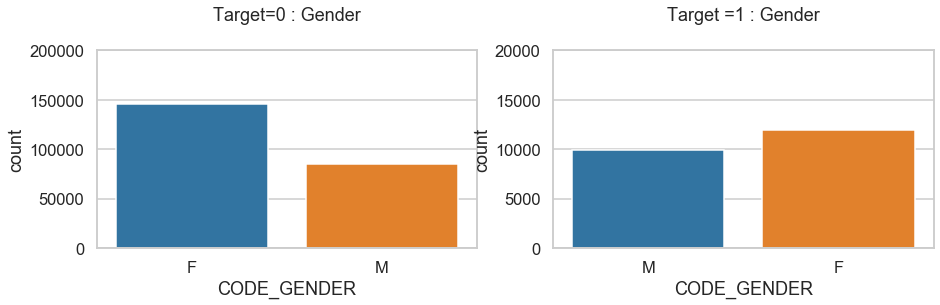

In [167]:
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,200000)
plt.title('Target=0 : Gender')
sns.countplot(t0['CODE_GENDER'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : Gender')
plt.ylim(0,20000)
sns.countplot(t1['CODE_GENDER'])
plt.show()

### Conclusion from above view:
1. The count of females is more for tendency of defaulter.

### 4. Target with NAME_CONTRACT_TYPE


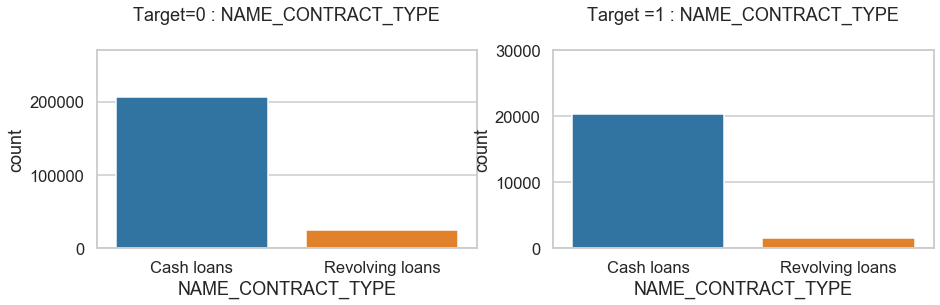

In [168]:
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,270000)
plt.title('Target=0 : NAME_CONTRACT_TYPE')
sns.countplot(t0['NAME_CONTRACT_TYPE'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : NAME_CONTRACT_TYPE')
plt.ylim(0,30000)
sns.countplot(t1['NAME_CONTRACT_TYPE'])
plt.show()


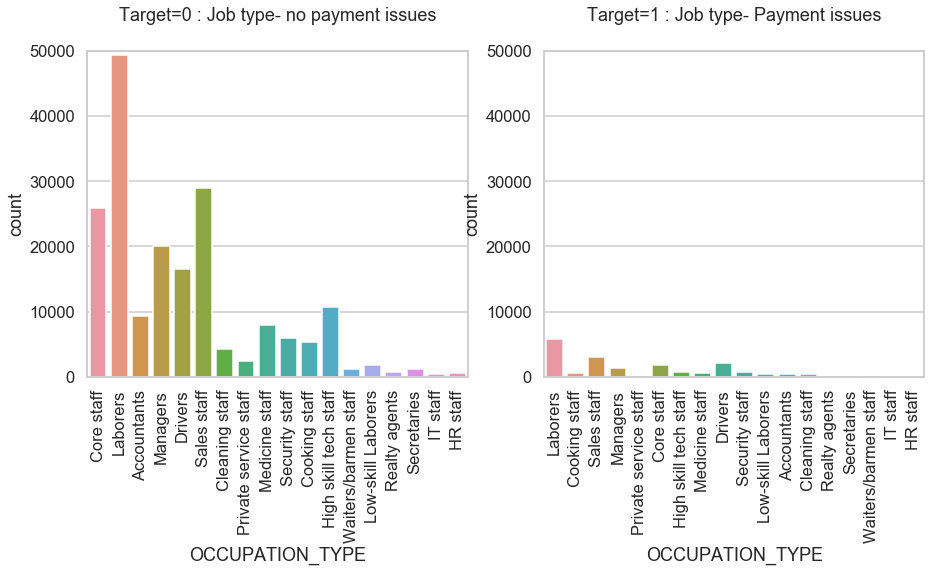

In [169]:
# Categorical variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)
#plt.subplots_adjust(wspace=0.5)


sns.countplot(t0['OCCUPATION_TYPE'])
plt.title('Target=0 : Job type- no payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(t1['OCCUPATION_TYPE'])
plt.title('Target=1 : Job type- Payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)
plt.show()


### 5. Target with FLAG_OWN_CAR

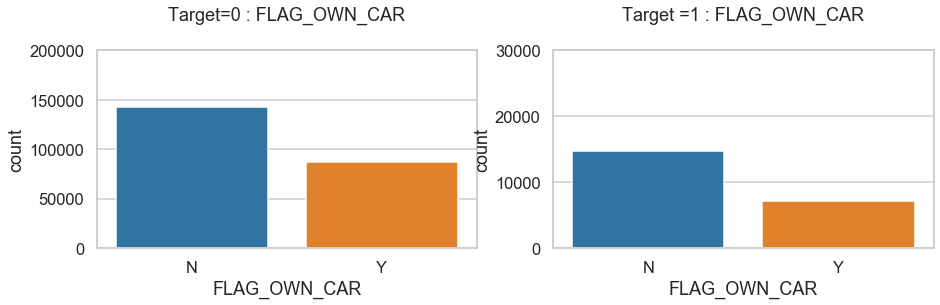

In [170]:
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,200000)
plt.title('Target=0 : FLAG_OWN_CAR')
sns.countplot(t0['FLAG_OWN_CAR'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : FLAG_OWN_CAR')
plt.ylim(0,30000)
sns.countplot(t1['FLAG_OWN_CAR'])
plt.show()

### 6. Target with FLAG_OWN_REALTY

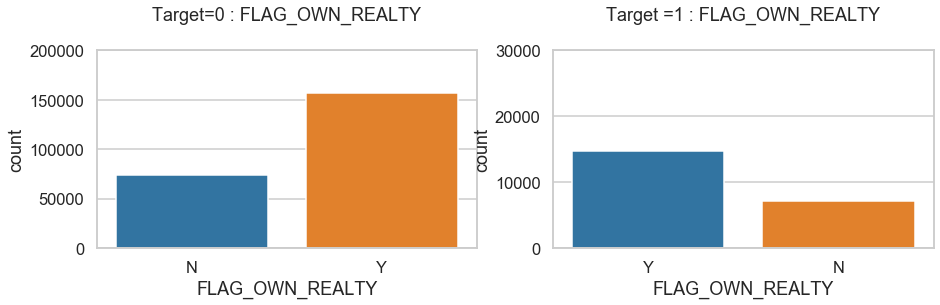

In [171]:
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,200000)
plt.title('Target=0 : FLAG_OWN_REALTY')
sns.countplot(t0['FLAG_OWN_REALTY'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : FLAG_OWN_REALTY')
plt.ylim(0,30000)
sns.countplot(t1['FLAG_OWN_REALTY'])
plt.show()

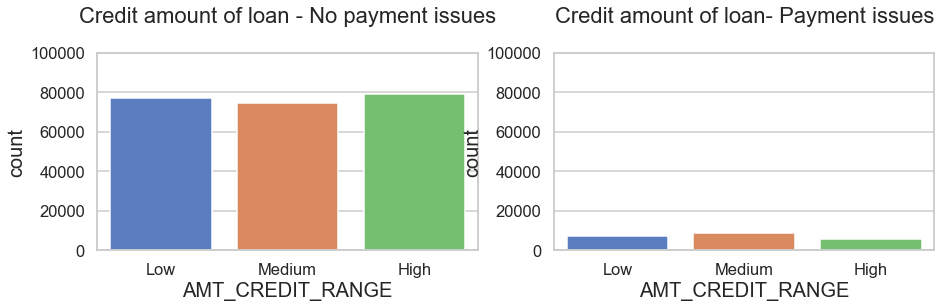

In [187]:
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Credit amount of loan - No payment issues')
sns.countplot(t0['AMT_CREDIT_RANGE'],palette='muted')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Credit amount of loan- Payment issues')
plt.ylim(0,100000)
sns.countplot(t1['AMT_CREDIT_RANGE'], palette='muted')
plt.show()

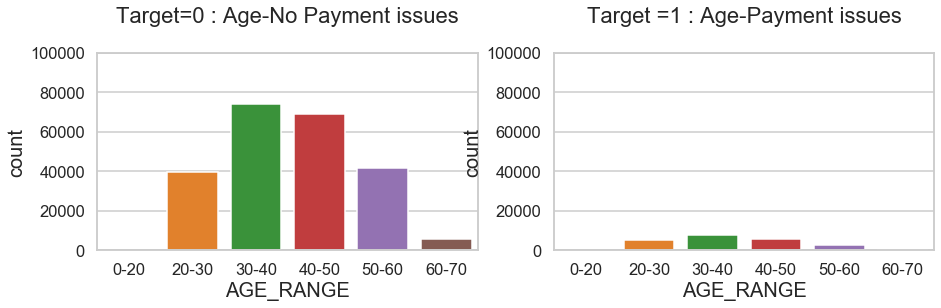

In [189]:
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Target=0 : Age-No Payment issues')
sns.countplot(t0['AGE_RANGE'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : Age-Payment issues')
plt.ylim(0,100000)
sns.countplot(t1['AGE_RANGE'])
plt.show()

###  7. Target with CNT_CHILDREN

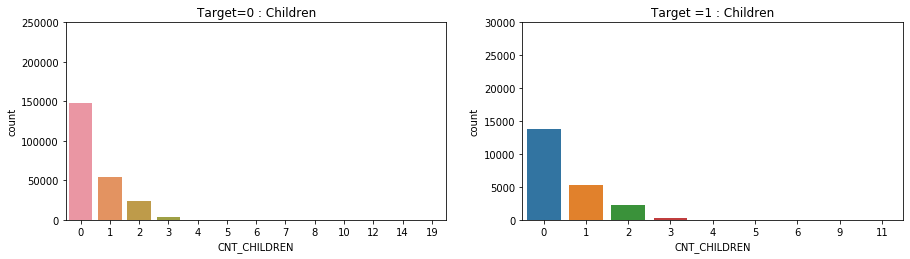

In [61]:

plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,250000)
plt.title('Target=0 : Children')
sns.countplot(t0['CNT_CHILDREN'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : Children')
plt.ylim(0,30000)
sns.countplot(t1['CNT_CHILDREN'])
plt.show()

### 8. Target with NAME_INCOME_TYPE

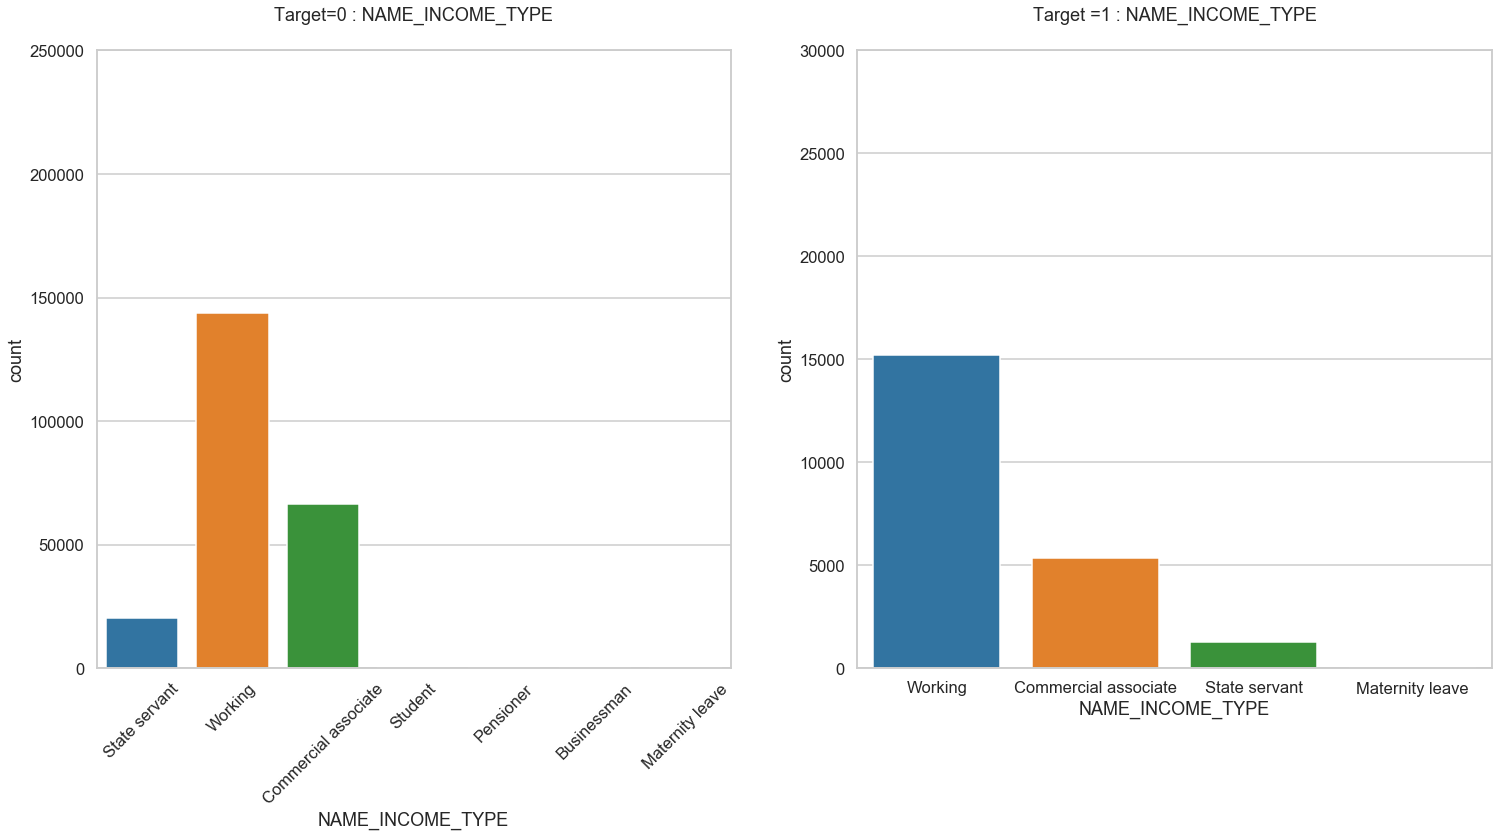

In [95]:

plt.figure(figsize = (25, 25))
plt.subplot(2, 2, 1)
plt.ylim(0,250000)
plt.xticks(rotation=45)
plt.title('Target=0 : NAME_INCOME_TYPE')
sns.countplot(t0['NAME_INCOME_TYPE'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : NAME_INCOME_TYPE')
plt.ylim(0,30000)
sns.countplot(t1['NAME_INCOME_TYPE'])
plt.show()

### Conclusion from above view:
1. The tendency of working professionals is more likely.

### 9. Target with NAME_EDUCATION_TYPE

In [63]:
t0.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    156286
Higher education                  63000
Incomplete higher                  8909
Lower secondary                    1972
Academic degree                     135
Name: NAME_EDUCATION_TYPE, dtype: int64

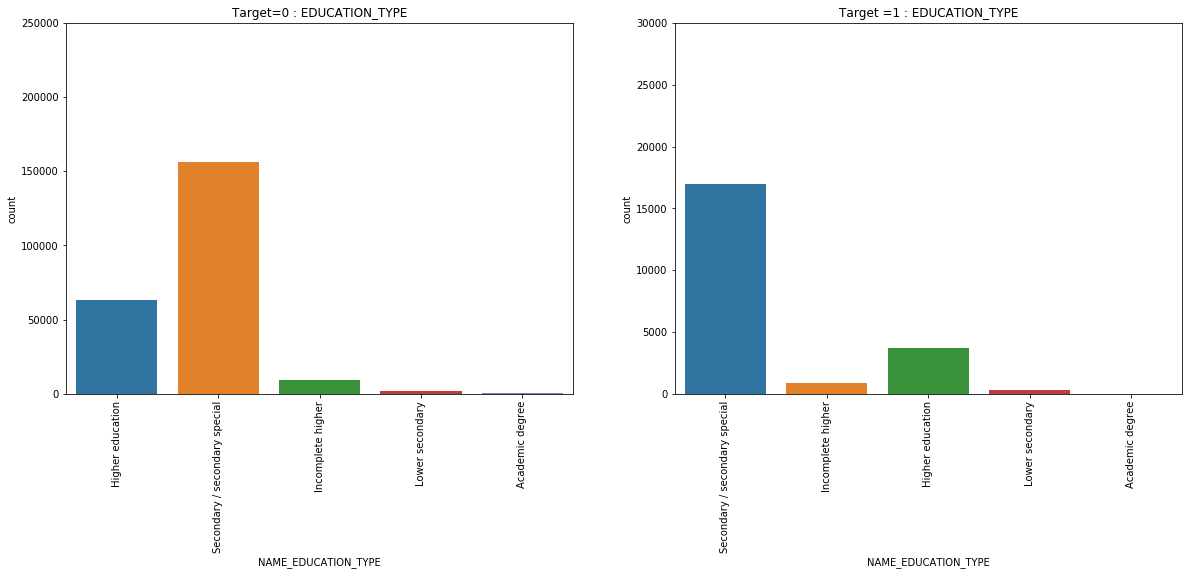

In [64]:

plt.figure(figsize = (20, 15))
plt.subplot(2, 2, 1)
plt.ylim(0,250000)
plt.title('Target=0 : EDUCATION_TYPE')
plt.xticks(rotation=90)
sns.countplot(t0['NAME_EDUCATION_TYPE'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : EDUCATION_TYPE')
plt.ylim(0,30000)
sns.countplot(t1['NAME_EDUCATION_TYPE'])
plt.xticks(rotation=90)
plt.show()

### 10. Target with NAME_FAMILY_STATUS

In [65]:
t0.NAME_FAMILY_STATUS.value_counts()

Married                 150725
Single / not married     35197
Civil marriage           23463
Separated                14608
Widow                     6307
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [66]:
t1.NAME_FAMILY_STATUS.value_counts()

Married                 13189
Single / not married     4119
Civil marriage           2734
Separated                1392
Widow                     401
Name: NAME_FAMILY_STATUS, dtype: int64

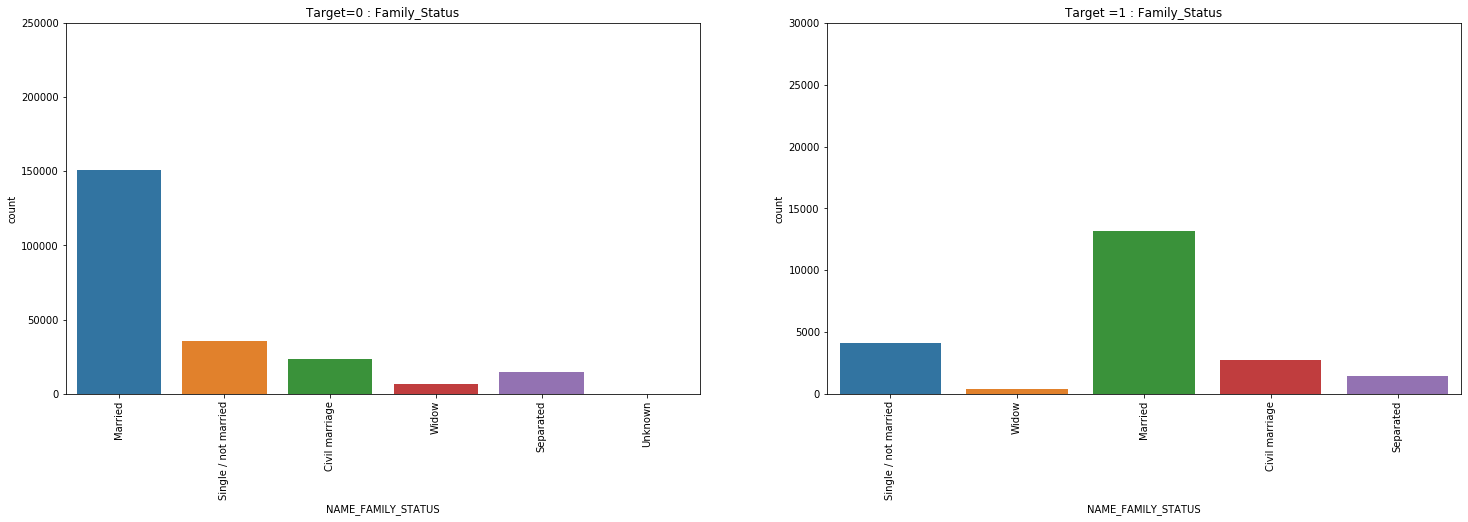

In [67]:
plt.figure(figsize = (25, 15))
plt.subplot(2, 2, 1)
plt.ylim(0,250000)
plt.title('Target=0 : Family_Status')
plt.xticks(rotation=90)
sns.countplot(t0['NAME_FAMILY_STATUS'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : Family_Status')
plt.ylim(0,30000)
sns.countplot(t1['NAME_FAMILY_STATUS'])
plt.xticks(rotation=90)
plt.show()

### 11. Target with NAME_HOUSING_TYPE

In [68]:
t0.NAME_HOUSING_TYPE.value_counts()

House / apartment      202011
With parents            12896
Municipal apartment      8236
Rented apartment         4089
Office apartment         2148
Co-op apartment           922
Name: NAME_HOUSING_TYPE, dtype: int64

In [69]:
t1.NAME_HOUSING_TYPE.value_counts()

House / apartment      18472
With parents            1725
Municipal apartment      814
Rented apartment         587
Office apartment         153
Co-op apartment           84
Name: NAME_HOUSING_TYPE, dtype: int64

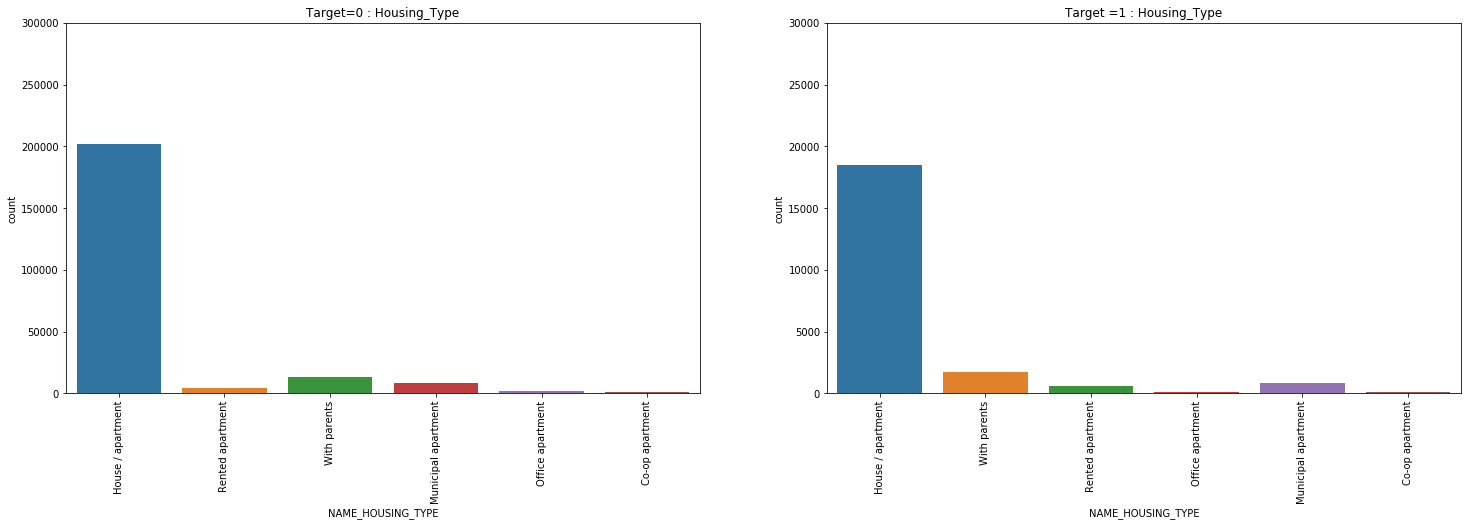

In [70]:
plt.figure(figsize = (25, 15))
plt.subplot(2, 2, 1)
plt.ylim(0,300000)
plt.title('Target=0 : Housing_Type')
sns.countplot(t0['NAME_HOUSING_TYPE'])
plt.xticks(rotation=90)

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : Housing_Type')
plt.ylim(0,30000)
sns.countplot(t1['NAME_HOUSING_TYPE'])
plt.xticks(rotation=90)
plt.show()

## Bivariate Analysis

### 1. Income vs Credit

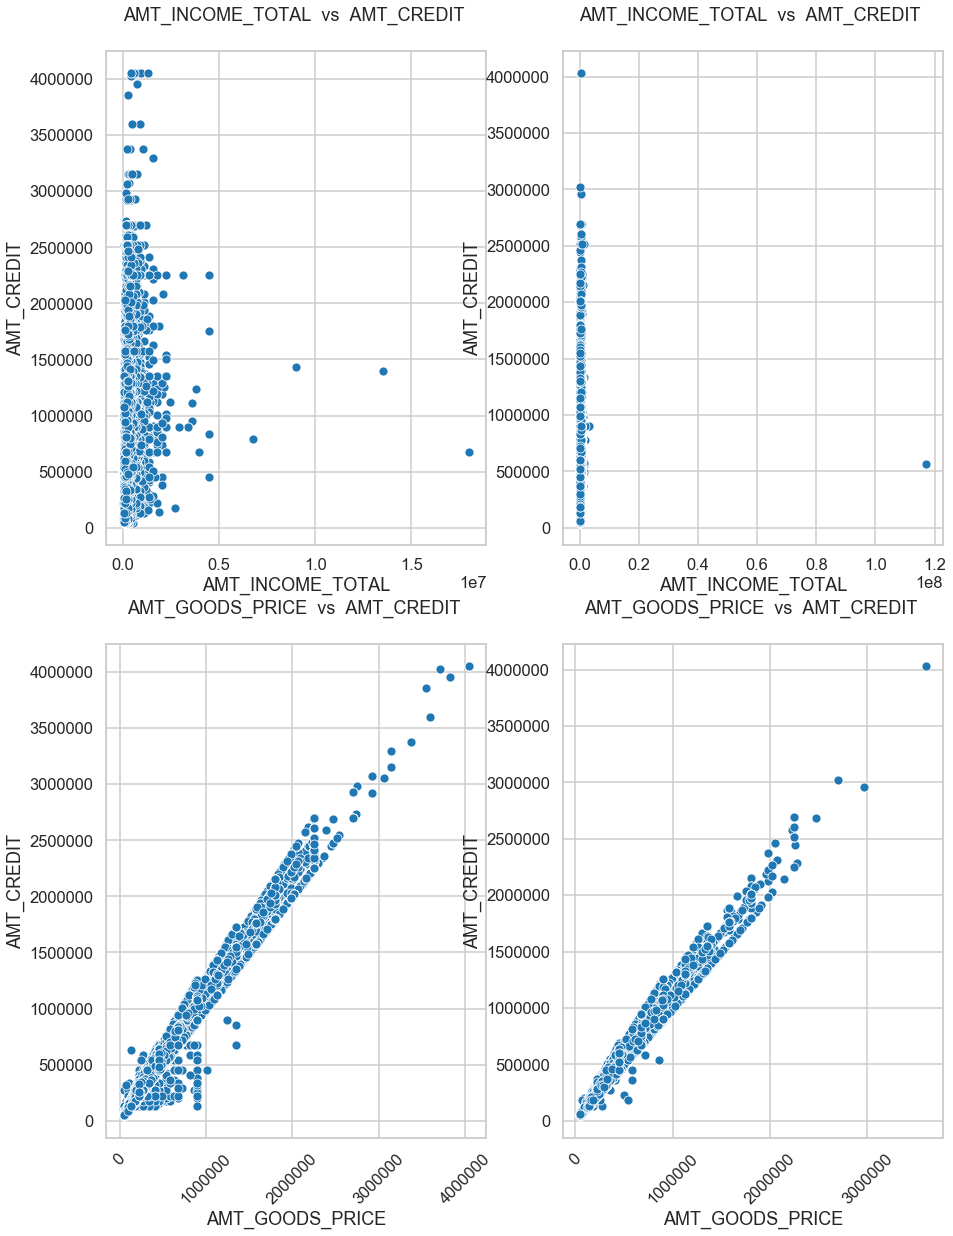

In [175]:
plt.figure(figsize = (15, 20))
# plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.scatterplot(t0.AMT_INCOME_TOTAL,t0.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')

plt.subplot(2,2,2)
sns.scatterplot(t1.AMT_INCOME_TOTAL,t1.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')


plt.subplot(2,2,3)
sns.scatterplot(t0.AMT_GOODS_PRICE,t0.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)

plt.subplot(2,2,4)
sns.scatterplot(t1.AMT_GOODS_PRICE,t1.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)
plt.show()

In [176]:
###Those who have paid the loan amount on/within time are more likely to get higher credits than those who didnt pay/did late payments.People who have higher goods price and have made payments on time have higher credits than those with higher goods price but didnt pay loan.¶

### 2. Income range- Gender

In [72]:
t0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_RANGE,AMT_CREDIT_RANGE,AMT_INCOME_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,High,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50-60,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,Medium,Low
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40-50,Medium,Low


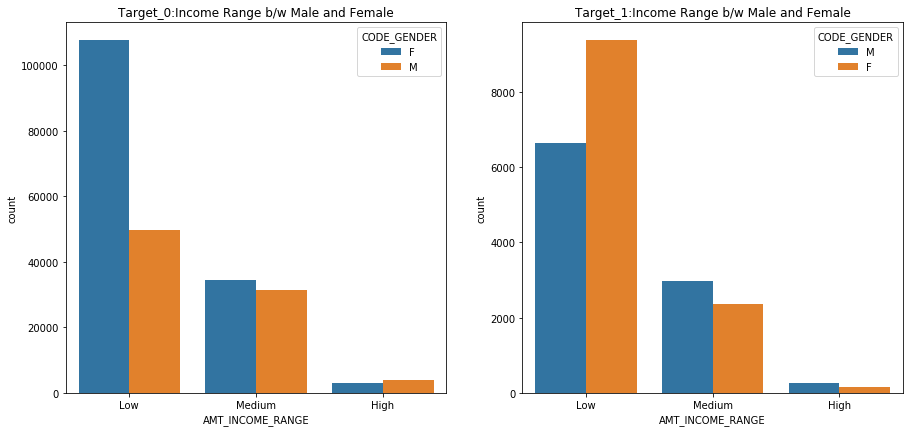

In [73]:
plt.figure(figsize = (15, 15))
# plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.countplot(x='AMT_INCOME_RANGE',data=t0,hue='CODE_GENDER')
plt.title('Target_0:Income Range b/w Male and Female')

plt.subplot(2,2,2)
sns.countplot(x='AMT_INCOME_RANGE',data=t1,hue='CODE_GENDER')
plt.title('Target_1:Income Range b/w Male and Female')
plt.show()

### 3. Education vs credit

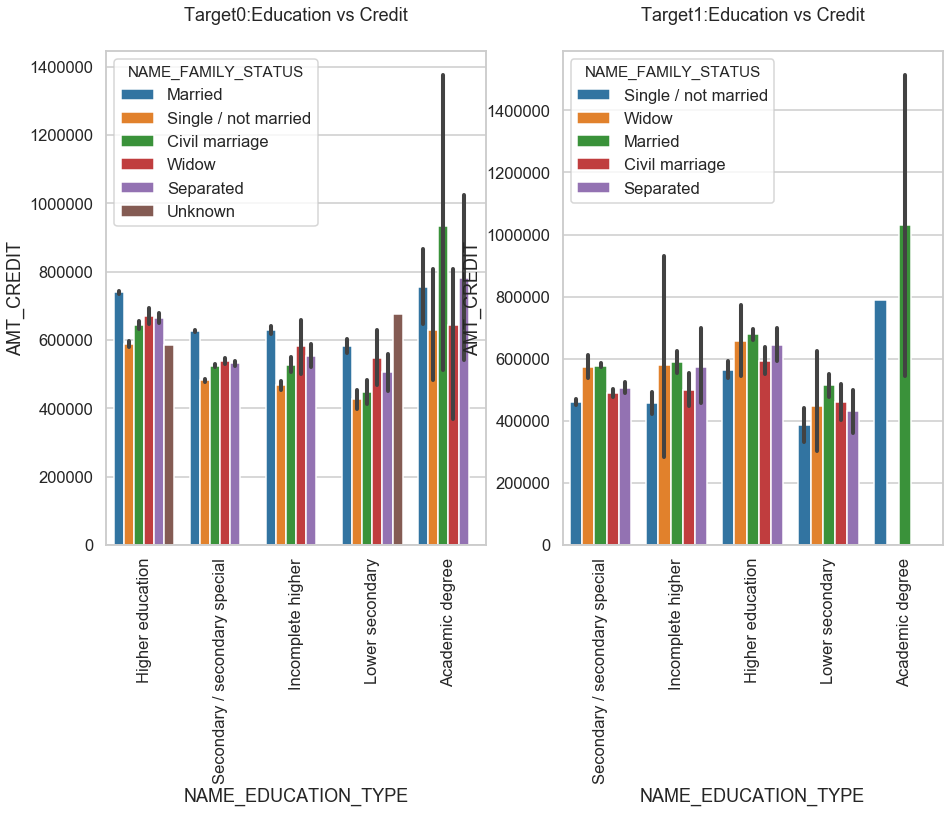

In [179]:
plt.figure(figsize = (15, 20))
# plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.barplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',data=t0,hue='NAME_FAMILY_STATUS')
plt.title('Target0:Education vs Credit')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.barplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',data=t1,hue='NAME_FAMILY_STATUS')
plt.title('Target1:Education vs Credit')
plt.xticks(rotation = 90)
plt.show()

In [181]:
###Some of the highly educated, married person are having credits higher than those who have done lower secondary eduction.
    ### The people with secondary and secndary special eduction are less likely to make payments on time.¶

### 4. Income vs Education

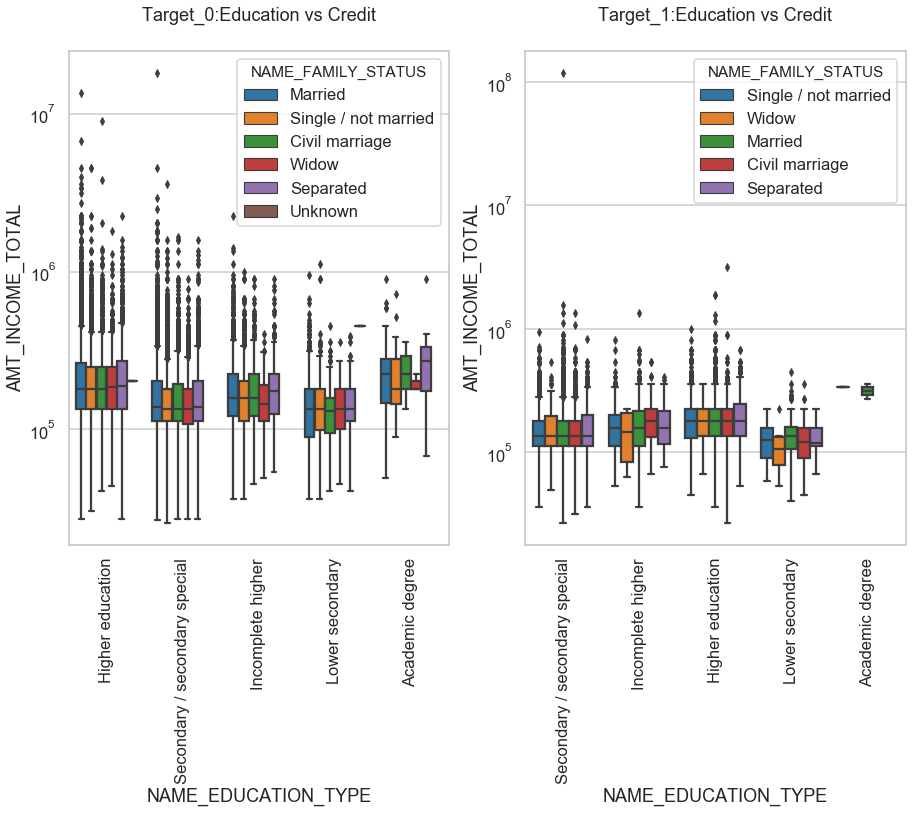

In [182]:
plt.figure(figsize = (15, 20))
# plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
plt.yscale('log')
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',data=t0,hue='NAME_FAMILY_STATUS')
plt.title('Target_0:Education vs Credit')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
plt.yscale('log')
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',data=t1,hue='NAME_FAMILY_STATUS')
plt.title('Target_1:Education vs Credit')
plt.xticks(rotation = 90)
plt.show()

###  Plotting Corelation Matrix:

Plotting the correlation Matrix between the target variables

In [183]:
t0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_RANGE,AMT_CREDIT_RANGE,AMT_INCOME_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,High,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50-60,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,Medium,Low
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40-50,Medium,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307503,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,...,2.0,0.0,0.0,0.0,1.0,0.0,2.0,30-40,Low,Low
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,40-50,Low,Low
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,20-30,Low,Low
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,40-50,Medium,Low


In [184]:
# Preparing co-relation matrix of data set Target 0 i.e. t0
t0_corr_matrx=t0.iloc[0:,2:]
t0_corr=t0_corr_matrx.corr(method='spearman')

# Preparing co-relation matrix of data set Target 1 i.e. t1
t1_corr_matrx=t1.iloc[0:,2:]
t1_corr=t1_corr_matrx.corr(method='spearman')


In [185]:
t0_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.027086,-0.030579,-0.266534,0.030948,0.155518,-0.119164,...,0.026816,0.005460,0.026536,0.003688,-0.000106,0.001123,-0.000679,-0.013133,-0.001684,-0.035374
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.408533,0.110074,0.054666,-0.060868,0.040559,-0.036702,...,-0.036970,-0.034036,-0.036669,-0.034723,0.002652,0.007412,0.009712,0.069404,0.027260,0.053694
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.985074,0.060706,0.169030,-0.104251,-0.015318,-0.038197,...,-0.001623,-0.018819,-0.001530,-0.021286,-0.004249,0.000323,-0.006210,0.042889,0.028180,-0.036601
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.824329,0.064328,0.100287,-0.074643,0.010712,-0.027354,...,-0.014584,-0.019623,-0.014335,-0.022262,0.004099,0.002854,0.013346,0.046981,0.027876,0.004549
AMT_GOODS_PRICE,-0.027086,0.408533,0.985074,0.824329,1.000000,0.069899,0.169016,-0.109327,-0.014986,-0.039785,...,-0.002392,-0.019924,-0.002256,-0.021782,-0.003442,0.000450,-0.005290,0.044009,0.029176,-0.039098
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,0.069899,1.000000,0.041663,0.000900,-0.042400,-0.010299,...,0.009504,0.027468,0.010062,0.021781,-0.003992,-0.000289,-0.004859,0.052872,-0.003434,0.002904
DAYS_BIRTH,-0.266534,0.054666,0.169030,0.100287,0.169016,0.041663,1.000000,-0.307787,-0.265449,-0.083331,...,-0.032435,-0.021416,-0.032063,-0.021419,-0.002012,-0.004305,0.000282,0.016461,-0.001917,0.048498
DAYS_EMPLOYED,0.030948,-0.060868,-0.104251,-0.074643,-0.109327,0.000900,-0.307787,1.000000,0.126708,0.106823,...,0.000300,0.007688,0.000391,0.008224,-0.003333,0.000361,-0.001334,-0.025654,0.002076,-0.021555
DAYS_REGISTRATION,0.155518,0.040559,-0.015318,0.010712,-0.014986,-0.042400,-0.265449,0.126708,1.000000,0.036788,...,0.019637,0.008927,0.019418,0.008576,-0.003617,0.001121,-0.001013,-0.013694,0.004404,-0.017957
DAYS_ID_PUBLISH,-0.119164,-0.036702,-0.038197,-0.027354,-0.039785,-0.010299,-0.083331,0.106823,0.036788,1.000000,...,-0.002631,0.010355,-0.003236,0.012305,0.004880,0.000376,-0.003262,-0.022157,-0.004396,-0.024802


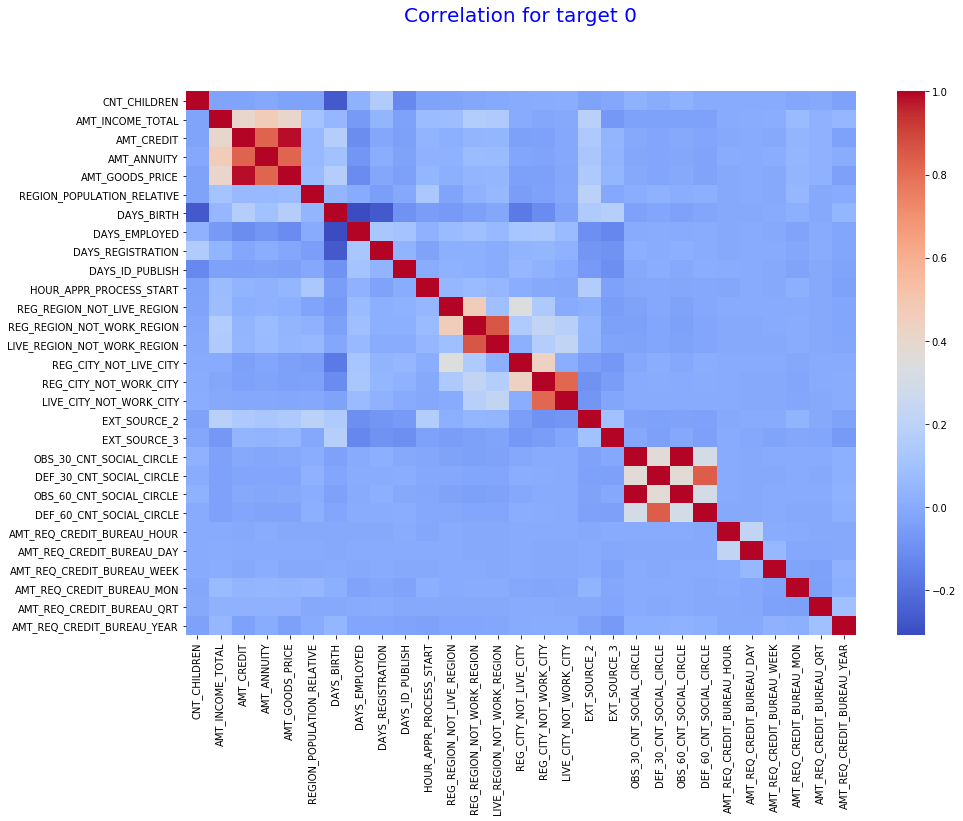

In [79]:
# Heat map definition for the correlations that we have found out.

plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 70
sns.heatmap(t0_corr, cmap="coolwarm",annot=False)
plt.title('Correlation for target 0',fontdict={'fontsize':20, 'fontweight':5, 'color':'Blue'})
plt.yticks(rotation=0)
plt.show()

As we can see from above correlation heatmap for t0, There are number of observation we can point out

1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
4. less children client have in densely populated area.
5. Credit amount is higher to densely populated area.
6. The income is also higher in densely populated area.

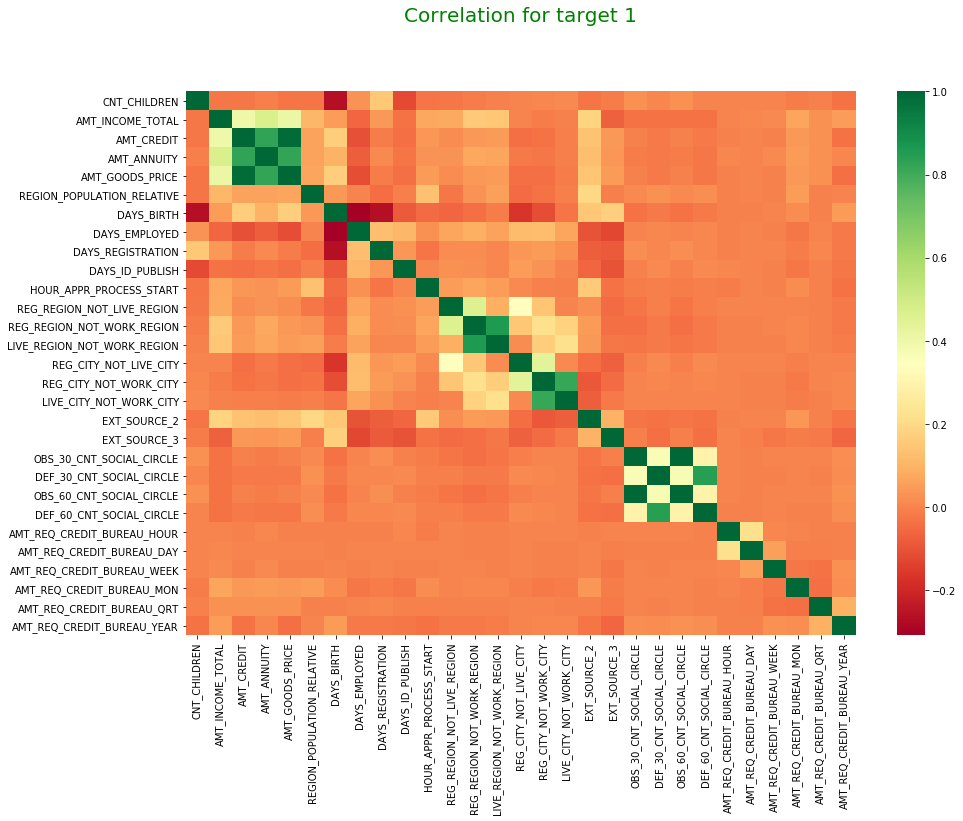

In [80]:
# Corelation Matrix for Target 1 
plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 70
sns.heatmap(t0_corr, cmap="RdYlGn",annot=False)
plt.title('Correlation for target 1',fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.yticks(rotation=0)
plt.show()

The heat map for Target 1 is same as Target 0 however there are certain points that are clearly visible as below.
1. The client's permanent address does not match contact address are having less children and vice-versa
2. the client's permanent address does not match work address are having less children and vice-versa

In [81]:
### Loading previous data
previous_data = pd.read_csv('previous_application.csv')

In [82]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
previous_data.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [84]:
# Removing the column values of 'XNA' and 'XAP'
previous_data=previous_data.drop(previous_data[previous_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_data=previous_data.drop(previous_data[previous_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_data=previous_data.drop(previous_data[previous_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
# previous_data=previous_data.drop(previous_data[previous_data['NAME_SELLER_INDUSTRY']=='XNA'].index)

In [85]:
previous_data.NAME_SELLER_INDUSTRY.value_counts()

XNA                     63993
Connectivity             5226
Consumer electronics      222
Furniture                 158
MLM partners               18
Construction               12
Industry                    5
Clothing                    1
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [86]:
merge_df=pd.merge(left=loan_data,right=previous_data,how='inner',on='SK_ID_CURR',suffixes='_x')


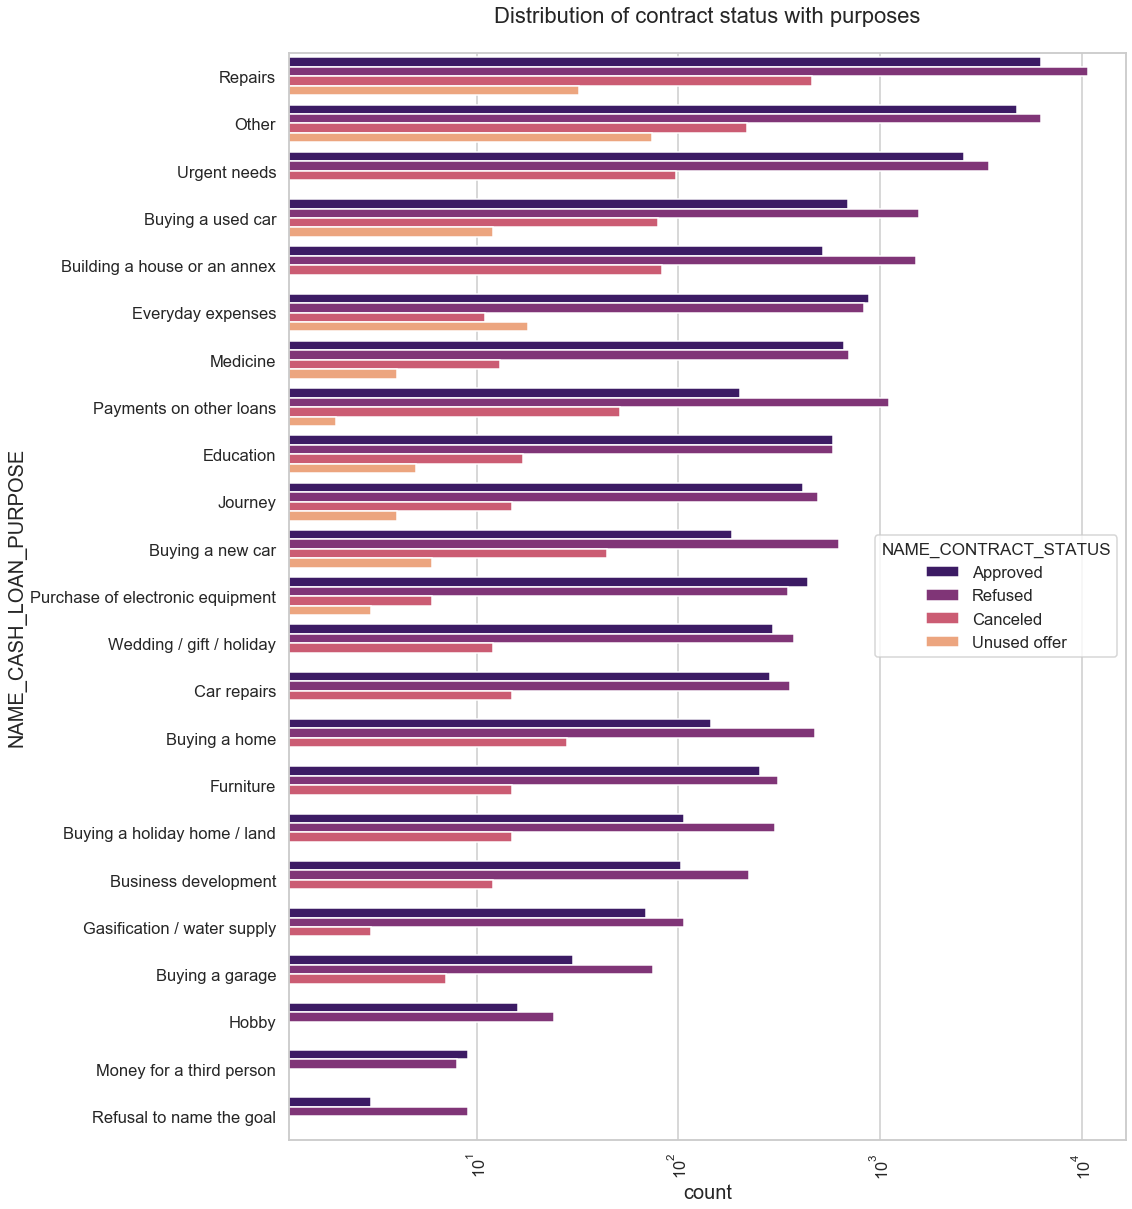

In [186]:
# Distribution of contract status with purposes

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = merge_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merge_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma') 

Points to be concluded from above plot:

1. The rejection of loans are mostly due to 'repairs'.
2. Purchase of a new car is having significant higher rejection than number of approvals.

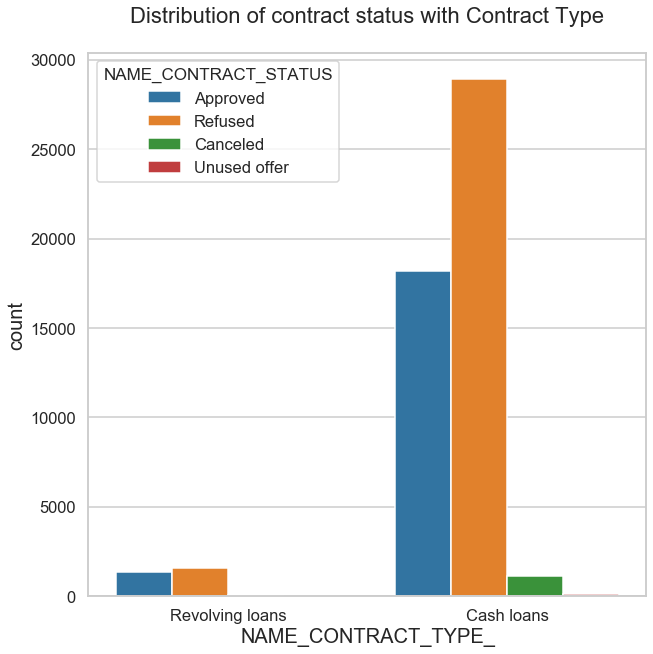

In [89]:
# Distribution of Contract Status with Contract Type
plt.figure(figsize=(10,10))
plt.title('Distribution of contract status with Contract Type')
sns.countplot(data=merge_df,x='NAME_CONTRACT_TYPE_',hue='NAME_CONTRACT_STATUS')
plt.show()

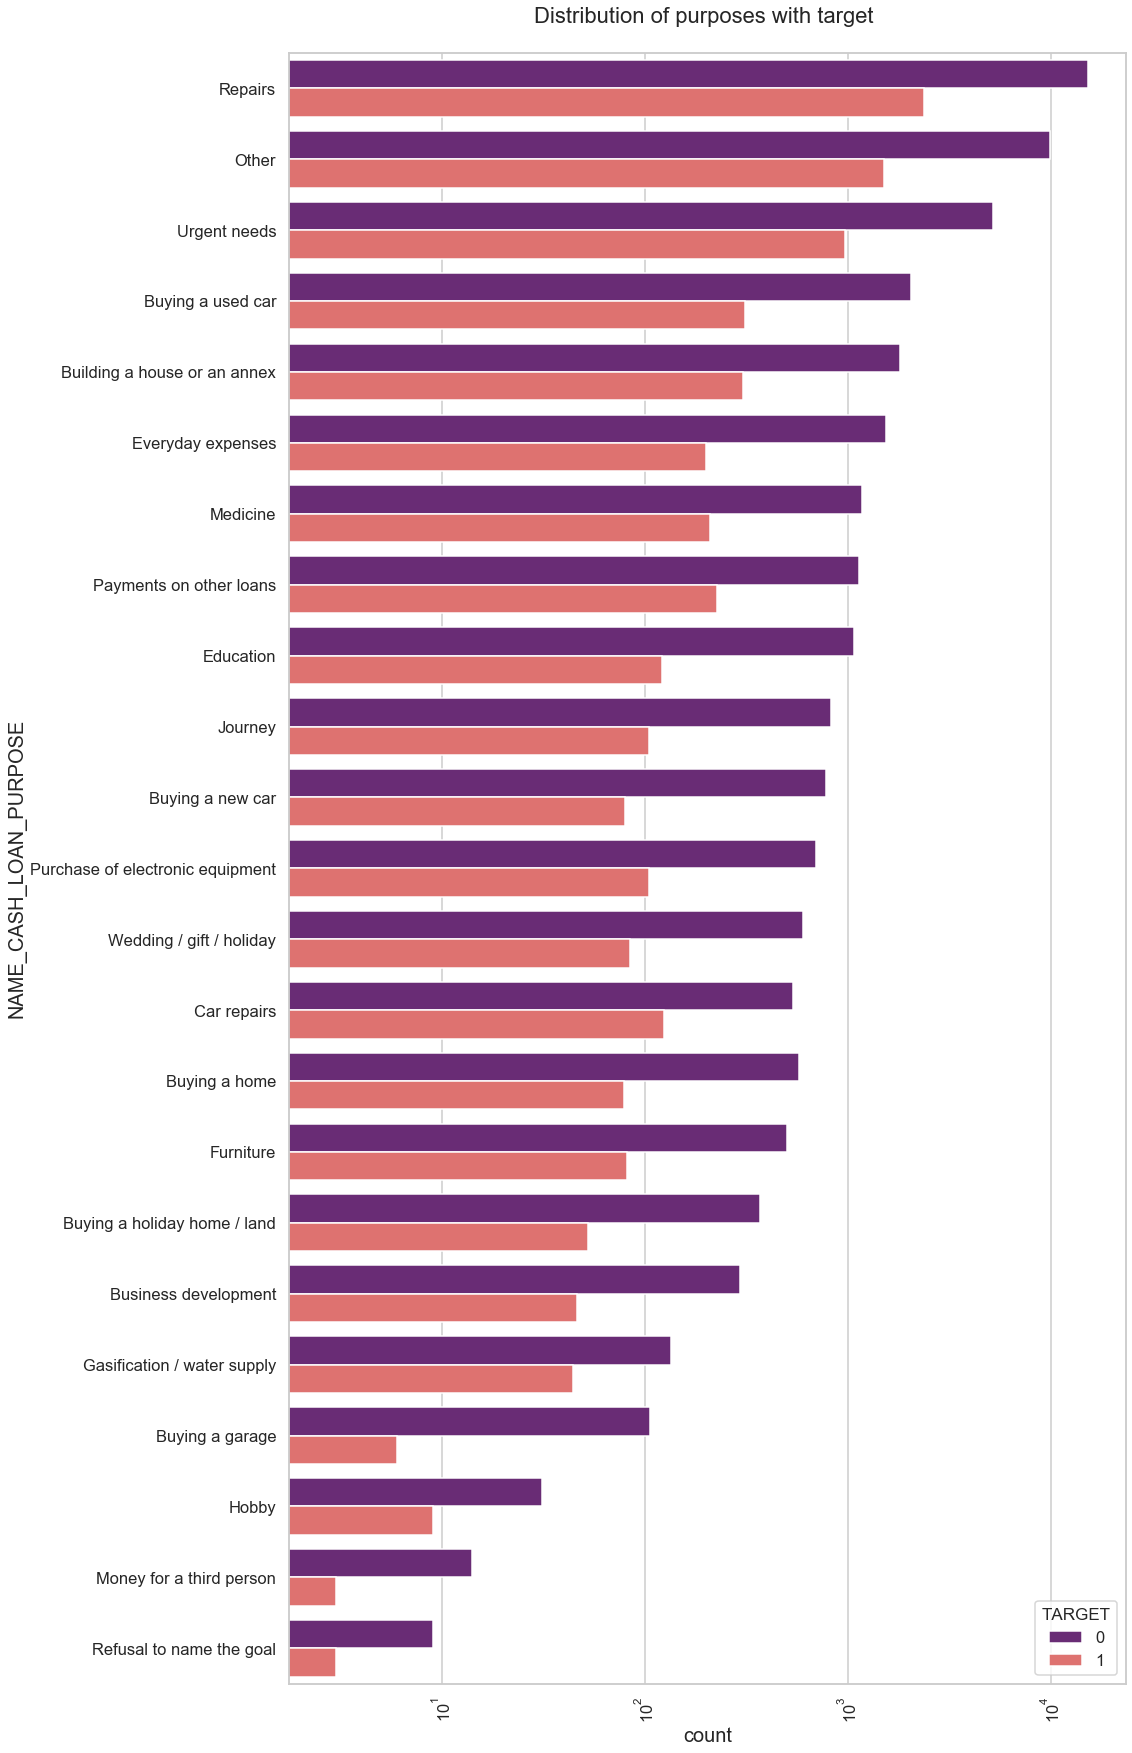

In [90]:
# Distribution of Purpose with Target

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = merge_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merge_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

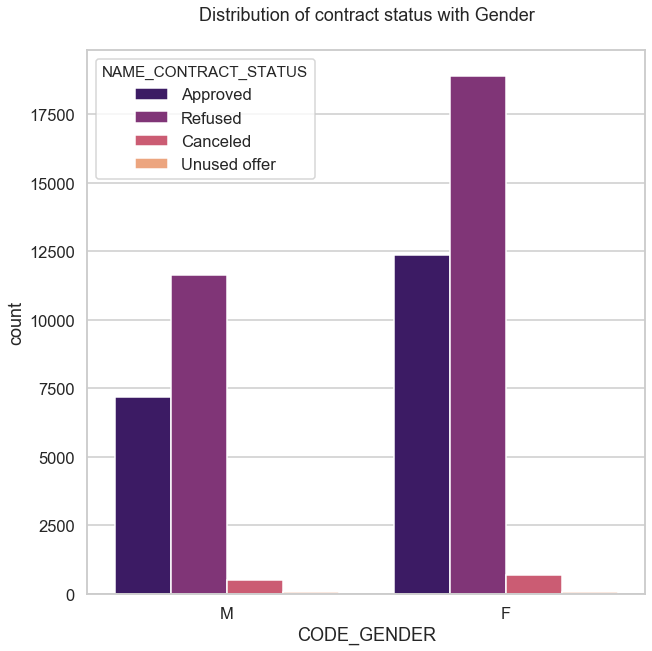

In [91]:
# Distribution of Contract Status with Code Gender

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10,10))
plt.title('Distribution of contract status with Gender')
sns.countplot(data=merge_df,x='CODE_GENDER',hue='NAME_CONTRACT_STATUS',palette='magma')
plt.show()

### Biveriate Analysis

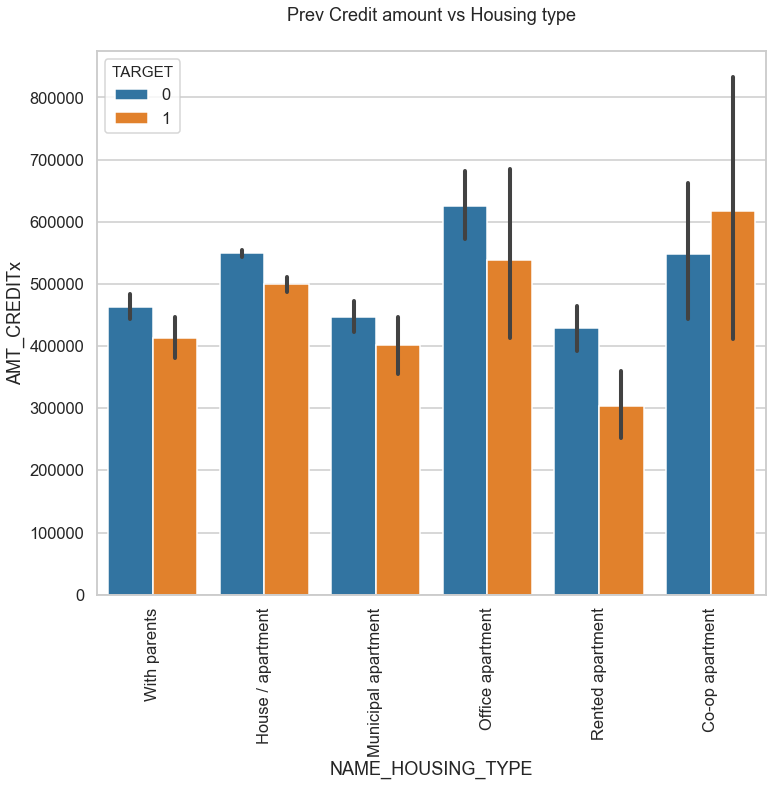

In [92]:
# Box Plot for Previous Credit Amount and Housing Type
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)
sns.barplot(data =merge_df, y='AMT_CREDITx',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1.
So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.
Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

### CONCLUSION

According to the analysis made, we can conclude on the below points:

1. For Income Type: Working there is more threat as the number of unsuccessful payments was far more in this section.
2. Loans undertaken for Repair work has higher chances of unsuccessful payments on time.
3. Banks can focus more on candidates having housing type 'With Parents' as their chances of unsuccessful payments is very less.
4. Also, Contract Type: Student and Businessmen can be considered more as they have better payment schedules.